### Data 620 - Week 6 Assignment
### Bikram Barua and Leticia Salazar
### March 5, 2023

#### Task:

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  
Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

#### Dataset:

Davis Southern Club Women - shows how to make unipartite projections of the graph and compute the
properties of those graphs. This data was collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The graph is bipartite (clubs, women).

#### Import Libraries

Below are the libraries we used for this assignment:

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

#### Import Data

Below we are using the code provided to us:

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


/var/folders/xs/s7qlj6l16qj7704tpbyx6rr80000gn/T/ipykernel_3073/1128200402.py:6: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(bipartite.biadjacency_matrix(G, women, clubs))


In [3]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [4]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")



#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


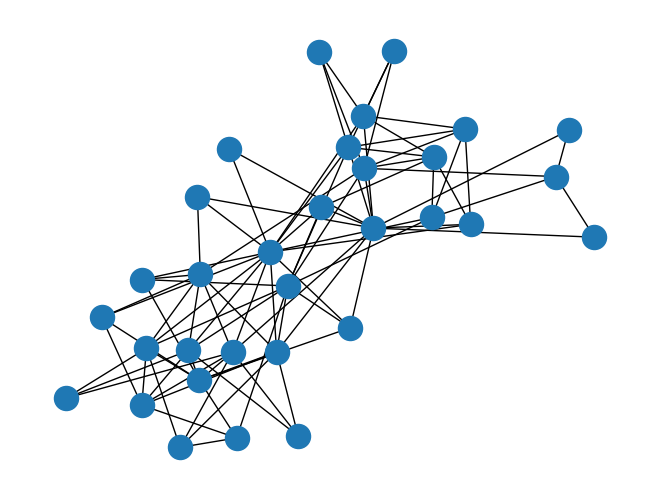

In [5]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

### Now our code and analysis below:

Let's check how many nodes and edges are there in this data:

In [6]:
print(W)

Graph with 18 nodes and 139 edges


... and the degrees:

In [7]:
print(W.degree)

[('Evelyn Jefferson', 17), ('Laura Mandeville', 15), ('Theresa Anderson', 17), ('Brenda Rogers', 15), ('Charlotte McDowd', 11), ('Frances Anderson', 15), ('Eleanor Nye', 15), ('Pearl Oglethorpe', 16), ('Ruth DeSand', 17), ('Verne Sanderson', 17), ('Myra Liddel', 16), ('Katherina Rogers', 16), ('Sylvia Avondale', 17), ('Nora Fayette', 17), ('Helen Lloyd', 17), ('Dorothy Murchison', 16), ('Olivia Carleton', 12), ('Flora Price', 12)]


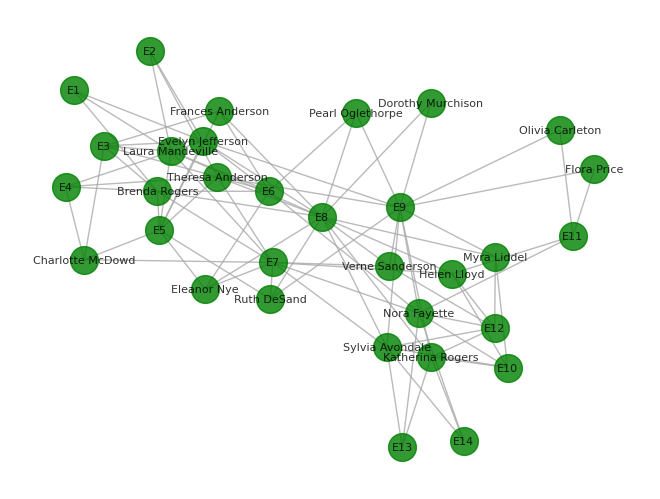

In [8]:
# drawing graph
pos = nx.spring_layout(G, seed=54)
nx.draw(G, pos, with_labels=True, node_size=400, node_color="green", font_size=8, 
        edge_color="darkgray", alpha=0.8)
plt.show()

In [9]:
# women nodes
W.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price'))

In [10]:
# viewing connections between women and events
G.edges()

EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), ('Theresa Anderson', 'E7'), ('Theresa Anderson', 'E8'), ('Theresa Anderson', 'E9'), ('Brenda Rogers', 'E1'), ('Brenda Rogers', 'E3'), ('Brenda Rogers', 'E4'), ('Brenda Rogers', 'E5'), ('Brenda Rogers', 'E6'), ('Brenda Rogers', 'E7'), ('Brenda Rogers', 'E8'), ('Charlotte McDowd', 'E3'), ('Charlotte McDowd', 'E4'), ('Charlotte McDowd', 'E5'), ('Charlotte McDowd', 'E7'), ('Frances Anderson', 'E3'), ('Frances Anderson', 'E5'), ('F

In [11]:
# viewing connections between women
W.edges()

EdgeView([('Evelyn Jefferson', 'Ruth DeSand'), ('Evelyn Jefferson', 'Nora Fayette'), ('Evelyn Jefferson', 'Charlotte McDowd'), ('Evelyn Jefferson', 'Olivia Carleton'), ('Evelyn Jefferson', 'Dorothy Murchison'), ('Evelyn Jefferson', 'Eleanor Nye'), ('Evelyn Jefferson', 'Sylvia Avondale'), ('Evelyn Jefferson', 'Laura Mandeville'), ('Evelyn Jefferson', 'Pearl Oglethorpe'), ('Evelyn Jefferson', 'Brenda Rogers'), ('Evelyn Jefferson', 'Frances Anderson'), ('Evelyn Jefferson', 'Theresa Anderson'), ('Evelyn Jefferson', 'Helen Lloyd'), ('Evelyn Jefferson', 'Myra Liddel'), ('Evelyn Jefferson', 'Verne Sanderson'), ('Evelyn Jefferson', 'Flora Price'), ('Evelyn Jefferson', 'Katherina Rogers'), ('Laura Mandeville', 'Ruth DeSand'), ('Laura Mandeville', 'Nora Fayette'), ('Laura Mandeville', 'Charlotte McDowd'), ('Laura Mandeville', 'Dorothy Murchison'), ('Laura Mandeville', 'Eleanor Nye'), ('Laura Mandeville', 'Sylvia Avondale'), ('Laura Mandeville', 'Pearl Oglethorpe'), ('Laura Mandeville', 'Brenda R

##### Now we dig into the centrality measures ...

In [12]:
#Degree Centrality
# G is the Graph
deg_centrality = nx.degree_centrality(G)
print("Top 10 Degree centrality nodes: ")
sorted(deg_centrality.items(), reverse= True, key=lambda x: x[1])[:10]
#print(deg_centrality)

Top 10 Degree centrality nodes: 


[('E8', 0.45161290322580644),
 ('E9', 0.3870967741935484),
 ('E7', 0.3225806451612903),
 ('Evelyn Jefferson', 0.25806451612903225),
 ('Theresa Anderson', 0.25806451612903225),
 ('Nora Fayette', 0.25806451612903225),
 ('E5', 0.25806451612903225),
 ('E6', 0.25806451612903225),
 ('Laura Mandeville', 0.22580645161290322),
 ('Brenda Rogers', 0.22580645161290322)]

As seen below: Evelyn Jefferson, Theresa Anderson and Nora Fayette have high degree centrality.

In terms of events, E8, E9 and E7 have the highest degree centrality.

In [13]:
#for node in G.nodes():   
    #print(node, nx.degree_centrality(G)[node])
    
for k, v in sorted(nx.degree_centrality(G).items(), reverse= True, key=lambda x: x[1])[:10]:
    print(k, ':', v)

E8 : 0.45161290322580644
E9 : 0.3870967741935484
E7 : 0.3225806451612903
Evelyn Jefferson : 0.25806451612903225
Theresa Anderson : 0.25806451612903225
Nora Fayette : 0.25806451612903225
E5 : 0.25806451612903225
E6 : 0.25806451612903225
Laura Mandeville : 0.22580645161290322
Brenda Rogers : 0.22580645161290322


From the results below many nodes have similar high closeness. Just like in degree centrality, Evelyn, Theresa and Nora have the highest closeness.

On the events side, E8, E9, and E7 also have the highest closeness.

In [14]:
#for node in G.nodes():
    #print(node, nx.closeness_centrality(G, node))
    
for k, v in sorted(nx.closeness_centrality(G).items(), reverse= True, key=lambda x: x[1])[:10]:
    print(k, ':', v)

E8 : 0.5961538461538461
E9 : 0.5535714285714286
Evelyn Jefferson : 0.5166666666666667
Theresa Anderson : 0.5166666666666667
Nora Fayette : 0.5166666666666667
E7 : 0.5166666666666667
Sylvia Avondale : 0.5
E6 : 0.484375
Laura Mandeville : 0.4696969696969697
Brenda Rogers : 0.4696969696969697


Nora Fayette has the highest betweeness along with events E8 and E9.

In [15]:
#for node in G.nodes(): 
    #print(node, nx.betweenness_centrality(G)[node])
    
for k, v in sorted(nx.betweenness_centrality(G).items(), reverse= True, key=lambda x: x[1])[:10]:
    print(k, ':', v)

E8 : 0.23700300426238308
E9 : 0.21920891071174742
E7 : 0.1258812653738273
Nora Fayette : 0.10858130346049079
Evelyn Jefferson : 0.09243053952845212
Theresa Anderson : 0.08382717212549207
Sylvia Avondale : 0.06862488078028632
E6 : 0.06319868906402719
Laura Mandeville : 0.04914868366576943
Brenda Rogers : 0.04735814390994237


Eigenvector centrality uses this matrix to compute its largest, most unique eigenvalues.
The resulting eigenvector is used as the metric. The basic idea behind this metric revolves around a nodes neighbors 
and how connected they are.

To score higher, a node needs to be well connected (high degree centrality) but it also needs to be connected to others
that are well connected.

Theresa Anderson, Evelyn Jefferson and Brenda Rodgers have the top 3 largest eigenvector centrality. It is interesting to note that maximum of all four centrality measurements are on separate nodes.

On the events side, the highest eigenvector centrality is given by E8.

In [16]:
#for node in G.nodes(): 
    #print(node, nx.eigenvector_centrality(G, max_iter=1000)[node])
    
for k, v in sorted(nx.eigenvector_centrality(G).items(), reverse= True, key=lambda x: x[1])[:10]:
    print(k, ':', v)

E8 : 0.35824435911378705
E7 : 0.2711782244726617
E9 : 0.2683424242623056
Theresa Anderson : 0.262027292675683
Evelyn Jefferson : 0.23669199956593817
E6 : 0.2316623040078495
E5 : 0.227500512695069
Brenda Rogers : 0.22132997761985013
Laura Mandeville : 0.21865425850665976
Sylvia Avondale : 0.19599165124742376


Based on these results, there are multiple women who attend plenty of events together but there are a couple of women who attend the same events together. A more concrete conclusion, E8 is the most popular event attended by these women. While Evelyn and Theresa seem to always conincide in attending these events.

#### References:
* Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.
* Davis, A et al. (1941). Deep South. Chicago: University of Chicago Press.
* [Sorted output for centrality measures](https://faculty.nps.edu/rgera/MA4404/PythonCode/MetricsV2.html)
Python 3.5. METRICSV2. (n.d.). Retrieved March 5, 2023, from https://faculty.nps.edu/rgera/MA4404/PythonCode/MetricsV2.html 